** **Notification** **

As a reader of this notebook, images would be shown correctly. Accordingly, in the following link discriptions and images are shared in a pdf file.

https://drive.google.com/file/d/1SmndHWLj_Kq2FRSjc1d3KyJSFw94AGmS/view?usp=sharing

**1-Installation**

Install OpenPLC Runtime on both Master and Slave. Upload ‘elegant_v11.st’ program from repository ‘https://github.com/bmsousa/elegant’ on slave, then set up slave device by following configuration. To capture traffic, install Wireshark Network Analyzer (Version 4.0.2 - v4.0.2-0-g415456d13370).

•	Configuration of slave device in master device as shown in figure 1.

•	Connect master and slave with cat5 cable with length of 2 m.

First, run OpenPLC Runtime in slave then run it in master, second run OpenPLC Runtime in master, at the end start Wireshark capturing and let it to capture for about 2 min. Make screen shot considering characteristics of experiments as shown in figure 2. Save pcab file with appropriate name (for example including the date and the number of experiment). In addition, export report to csv. Do the same things for more 4 times.

![F01](Images/F01.png)



![F02](Images/F02.png)


**2-Devices**

**2-1-Master:**

ACER ASPIRE V3-571 (Intel Core i52450M 2.5GHz turbo boost up to 3.1GHz, 8GB DDR3)

**2-2-Slave:**

Raspberry Pi 3 Model B+ (1.4GHz 1.4GHz)

**2-3-Switch:**

3Com 3C17304A 4200 28-Port 10/100 Fast Ethernet Switch

**3-Preprocessing of dataset**

To analyze data, methods and functions of Pandas package is considered as the main tool to deal with raw data. In Table 1 all applied packages are mentioned. In table 1 top 5 rows from experiment number one, is shown to get familiar with the features and cell’s data format.

Table 1: Python packages applied to dealing with data

![T02](Images/T02.png)


![T02](Images/T02.png)


**4-Queries and Preprocessing**

Before everything, to apply all captured files in the same codes, it is necessary to rename all ‘csv’ files in precise format. So, a python code ‘rename_pcab_files.py’ is developed (e.g., ‘Pcab 01 221222.csv’)

**4-1-Main queries from raw data.**

As it is shown in table 2, some basic queries regarding captured packages including source Ips, Protocols, Length, etc. could be driven. For doing mentioned basic queries ‘pcab_analysis_v02.py’ is developed which generate two kinds of files including ‘*.csv’ and ‘*.txt’. The report is in ‘txt’ format which is shown in figure 1 (e.g., ‘Information Summary 01 221222.txt’)

**4-2-Preprocessing of raw data**

As it is shown in table 1, the last column (‘Info’) includes different information such as ‘Query/Response’, ‘Trans Number’, ‘Function Number’ and ‘Function Description’. To deal with this column, in preprocessing program it is divided into six columns extracted via program ‘pcab_analysis_v02.py’:

•	‘Info_01’: it shows that the packet belongs to Query or Response.

•	‘Commands’: it shows command, in another word functions related to each packet.

•	‘Trans’: it shows transmission number for each packet.

•	‘R_W’: it is extracted form ‘Commands’ which is divided by three and includes: ‘Write’ or ‘Read’ as the first part of commands’ phrase.

•	‘D_M_I_H’: it is extracted as the same as ‘R_W’ and includes: 'Discrete', 'Multiple', 'Input' or 'Holding' as the second part of commands’ phrase.

•	‘I_C_R’: it is extracted as the same as ‘R_W’ and includes: ‘Inputs’, ‘Coils’ or ‘Registers’  as the third part of commands’ phrase.

**4-3-Calculating new items**

Regarding doing analysis, it is necessary to calculate some and assign new columns which inspire meaning to some raw data. For instance, regarding understanding round trip of packets, times related to precise transmission number; however, the first step is calculation of each packet time length. Some calculation formulas are mentioned in the following equation:

![Eq01](Images/Eq01.png)

In which β shows basic time difference, τ shows time related to each one-way transmission and i shows the raw number. Box plot and histogram is drawn by programs ‘pacb_histogram.py’ and ‘pcab_boxplot.py’.

![TEq02](Images/Eq02.png)

In which δ shows time duration of round-trip packet for transmission number i (data in ‘Trans’ column), j is raw belongs to ‘Response’ joined with i and k is raw belongs to ‘Query’ joined with i. Note that, there is not any column including δ_i , instead it is issued by making queries from dataset. Box plot and histogram is drawn as previous.
As the same as previous, it is possible to query times interval between each query by sequence of transmission number and each response and box plot and histogram is drawn.
It is assumed that difference of times between query and responses for a specific transmission is equal to the time of delay of packet transmission Box plot and histogram is drawn as previous.

![Eq03](Images/Eq03.png)


In which θ shows packet consumption’ for transmission number i (data in ‘Trans’ column), δ_j is raw belongs to ‘Query’ joined with i and ϑ_j is raw belongs to ‘Response’ joined with i.


![F03](Images/F03.png)

Figure 3: First parst Explain Complete Transmission Latency following the idea of second part (Reference of below part of figure: Antonio Virdis, Giovanni Nardini, Giovanni Stea and Dario Sabella "End-to-End Performance Evaluation of MEC Deployments in 5G Scenarios", doi:10.3390/jsan9040057)

It is assumed that difference of times between two responses is equal to the time of processing in master plus time consumption to send message from master to slave plus processing time in slave and at the end plus time consumption to response to the master which is considered as ‘packet consumption’ time in this experiment. Box plot and histogram is drawn as previous.
![Eq04](Images/Eq04.png)

In which θ shows packet consumption’ for transmission number i (data in ‘Trans’ column), j is raw belongs to ‘Response’ joined with i and k is raw belongs to ‘Response joined with i+1.

![F04](Images/F04.png)



**5-Remarks**

Durations of these Runnings are considered 120 s, in other words capturing could be for a longer period and only 120 s of that extracted to study.

Some transmissions are not completed during the considered time slot which are detected and shown in *.txt report files. In addition, must be omitted for some statistical analysis.

In some selected time slot, data set is started by response which is related to a query that is not in extracted time slot, so this raw must be omitted from dataset.



From this point to end of results, the python functions which generate the results have been described.


![F05](Images/F05.png)





** **Important Notice** **

**1-**

* Moving forward, all images required for the report will be generated using code. For instance, the image labeled as Figure 5 above is created using the codes provided below.

**2-**

* There are various parameters associated with image generation that you can adjust to enhance your understanding of their significance in the graphs.

**3-**

* For each each fiure based on their number, some fuctiond are developed in the following whit the name of figures respectedly. For instanse "figure_06 refered to fuctions genearting figure 6 of this report.

**===============================================================================================**

** **Imprtant Notice to Run Perfectly** **

If you want 'Run All', please consdier put:

**For 1st Run**

* permission_df_generating = True

* permission_graphs_drawing = False

**For 2sd Run**

* permission_df_generating = False

* permission_graphs_drawing = True

* Consider to extract generated csv file generated address from /kaggle/working/

in next code block, otherwise errors will be appeared

****Never Run 2sd part more than one time****



In [ ]:
permission_df_generating = True

permission_graphs_drawing = False

**===============================================================================================**

** **1st Part of Codes** **

In [ ]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import re
import warnings
import glob
import os
from datetime import datetime
from time import sleep
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

**===============================================================================================**

In [ ]:
## Finding items of 'Source' column from original csv generated by Wireshark
## to have a better comprehension, refer to Table 2
def source_ip_list_function(source_items):
    ## Declaring the regex pattern for IP addresses
    source_ip_list = []
    pattern = re.compile(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
    for item in source_items:
        if pattern.match(item):
            source_ip_list.append(item)
    return source_ip_list
# Results: ['169.254.83.9', '169.254.149.247', '3Com_78:9b:01', 'Raspberr_58:67:86', 'fe80::4276:956:94c0:f49f', 'CompalIn_a0:2a:f2', '0.0.0.0', 'fe80::657f:b6ca:2f8a:5309']

In [ ]:
## Finding items of 'Destination' column as 'Source' regarding IPs
## to have a better comprehension, refer to Table 2
def destination_ip_list_function(destination_items):
    destination_ip_list = []
    pattern_ip = re.compile(r'(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
    for item in destination_items:
        if pattern_ip.match(item):
            destination_ip_list.append(item)
    return destination_ip_list
# Results: ['169.254.83.9', '169.254.149.247', '0.0.0.0']

In [ ]:
## Funcion to return Query_response time Add new features
## This feature is described in 4-1
def Q_R(x):
    s = re.search('Query|Response', x)
    if s == None:
        return np.nan
    else:
        return s.group()

In [ ]:

## Extracting transmission number for each packet
## This feature is described in 4-2
def Trans(x):
    s = re.search('Trans:.*;', x)
    if s == None:
        return np.nan
    else:
        s = s.group()[8:-1]
        return int(s)

In [ ]:
## Finding Commands
## This feature is described in 4-2
def Commands(x):
    s = re.search('[a-zA-Z]+ [a-zA-Z]+ [a-zA-Z]{1,}', x)
    if s == None:
        return np.nan
    else:
        s_1 = s.group()
        return s_1

In [ ]:
## Finding 'Read' or 'Write
## This feature is described in 4-2
def R_W(x):
    s = re.search('[a-zA-Z]+ [a-zA-Z]+ [a-zA-Z]{1,}', x)
    if s == None:
        return np.nan
    else:
        s_1 = s.group()
        s_2 = s_1.split(' ')
        return s_2[0]

In [ ]:
## Finding 'Discrete' , 'Multiple' , 'Input' or 'Holding'
## This feature is described in 4-2
def D_M_I_H(x):
    s = re.search('[a-zA-Z]+ [a-zA-Z]+ [a-zA-Z]{1,}', x)
    if s == None:
        return np.nan
    else:
        s_1 = s.group()
        s_2 = s_1.split(' ')
        return s_2[1]

In [ ]:
## Finding 'Inputs', 'Coils' or 'Coils'
## This feature is described in 4-2
def I_C_R(x):
    s = re.search('[a-zA-Z]+ [a-zA-Z]+ [a-zA-Z]{1,}', x)
    if s == None:
        return np.nan
    else:
        s_1 = s.group()
        s_2 = s_1.split(' ')
        return s_2[2]

In [ ]:
# This function has been designed to create a summary report of network traffic in *.txt format.
def text_report(number_samples, destination_ip, protocol_items_size, protocol_items_lenghts, Commands_Dict, trans_no_query, trans_no_response, path_out_analysis):
    # Generating txt Report
    path_text_report = path_out_analysis+'Analyzed merged.txt'
    f = open(path_text_report, 'a')
    f.write(
            '\nNumber of Samples: ' + str(number_samples) +
            '\n' +
            '\n............................................................' +
            '\nSource - Destination' + ' '*(35-len('Source - Destination'))+ ': ' + 'Total Number' +            '\n............................................................')
    for item in destination_ip.keys():
        f.write('\n' + str(item) + ' '*(35-len(item)) + ': ' + str(destination_ip[item]))
    f.write('\n' +
            '\n............................................................' +
            '\nProtocols' + ' '*(15-len(str('Protocols'))) + ': ' + 'Total Number' + ' '*(15-len(str('Total Number'))) + ': ' + 'Mean of Lenght' +
            '\n............................................................')
    for item in protocol_items_size.keys():
        f.write('\n' + str(item) + ' '*(15-len(item)) + ': ' + str(protocol_items_size[item]) + ' '*(15-len(str(protocol_items_size[item]))) +
        ': ' + str(protocol_items_lenghts[item]))
    f.write('\n' +
            '\n............................................................' +
            '\nCommands' + ' '*(30-len('Commands')) + ': ' + 'Total Number'
            '\n............................................................')
    for item in Commands_Dict.keys():
        f.write('\n' + str(item) + ' '*(30-len(item)) + ': ' + str(Commands_Dict[item]))
    f.write('\n' +
            '\n............................................................' +
            '\n                not rounded Transmissions' +
            '\n' +
            '\nType of Transmission' + ': Counts' + ' '*4 + ': Trans Number'
            '\n............................................................')

    f.write('\n' + 'Query' + ' '*(15) + ': ' + str(len(trans_no_query)) + ' '*(10-len(str(len(trans_no_query)))) + ': ')
    for item in trans_no_query:
         f.write(str(int(item)) + ', ')
    f.write('\n' + 'Response' + ' '*(12) + ': ' + str(len(trans_no_response)) + ' '*(10-len(str(len(trans_no_response))))+ ': ')
    for item in trans_no_response:
         f.write(str(int(item)) + ', ')
    f.close()

    sleep(5)

    f = open(path_text_report, 'r')
    content = f.read()
    print(content)
    f.close()


In [ ]:
## Calculationg Transmission time including the following procedure:
## 1- Finding 'Trans' items which are not pairs of 'Query' and 'Response'
## 2- Extracting all 'Trans' items
def transactions_items_function(pcab_query_response, transactions_items):
    trans_no_response = []
    trans_no_query = []
    for item in transactions_items:
        if pcab_query_response[pcab_query_response['Trans'] == item]['Info_01'].shape[0] == 1:
            if list(pcab_query_response[pcab_query_response['Trans'] == item]['Info_01'])[0] == 'Query':
                trans_no_query.append(item)
            elif list(pcab_query_response[pcab_query_response['Trans'] == item]['Info_01'])[0] == 'Response':
                trans_no_response.append(item)
            # Delete rows related of without 'Response' or 'Query'
            pcab_query_response = pcab_query_response[pcab_query_response['Trans'] != item]
    return pcab_query_response, trans_no_response, trans_no_query

In [ ]:
## It is the main function for data preprocessing, needless to say that all above mnetioned functions are developed to be applied in this function.
## At the begining, I have to generate dataframe from row *.csv files exported by wireshark.
## In the following, mentioned Features in section 4 will be extracted and calculatedd to form necessary DataFrame..
def pcab_analysis (pcab_raw, path_out_analysis, text_report_value):

    ## Time > 120 is deleted to follow exactly 2 min of experience
    pcab = pcab_raw[pcab_raw['Time'] <= 120]

    ## Finding items of 'Source' column from original csv generated by Wireshark
    source_items = list(pcab['Source'].unique())
    # Extracting detected ip list generated by Wireshark which are similr to : ['169.254.83.9', '169.254.149.247', '3Com_78:9b:01', 'Raspberr_58:67:86', 'fe80::4276:956:94c0:f49f', 'CompalIn_a0:2a:f2', '0.0.0.0', 'fe80::657f:b6ca:2f8a:5309']

    ## Finding items of 'Destination' column as 'Source' regarding IPs
    source_ip_list = source_ip_list_function(source_items)
    destination_items = list(pcab['Destination'].unique())

    ## Finding items of 'Destination' column as 'Source' regarding IPs
    destination_ip_list = destination_ip_list_function(destination_items)
    ## or we can do as following instead above code:
    destination_ip = pcab.groupby(['Destination']).size().to_dict()

    ## Finding items and number of 'Protocol'
    protocol_items_size = pcab.groupby(['Protocol']).size().to_dict()
    # Results of above code are similar to : {'ARP': 127, 'DHCP': 2, 'DHCPv6': 7, 'MDNS': 5, 'Modbus/TCP': 11227, 'SSDP': 4, 'STP': 60, 'TCP': 3}

    ## Calculating the average of 'Lenght' for each protocol
    protocol_items_lenghts = pcab.groupby(['Protocol']).agg({'Length':np.mean}).round(2).to_dict()
    protocol_items_lenghts = protocol_items_lenghts['Length']
    # Results of above code are similar to : {'Length': {'ARP': 59.29, 'DHCP': 342.0, 'DHCPv6': 145.0, 'MDNS': 103.4, 'Modbus/TCP': 67.9, 'SSDP': 217.0, 'STP': 64.0, 'TCP': 62.0}}

    ## Assigning new columns related to anlaysis of 'Info' column and issuing new data frame
    pcab_query_response = pcab.assign(Info_01 = pcab['Info'].apply(lambda x: Q_R(x)))
    pcab_query_response = pcab_query_response.assign(Commands = pcab['Info'].apply(lambda x: Commands(x)))
    pcab_query_response = pcab_query_response.assign(Trans = pcab['Info'].apply(lambda x: Trans(x)))
    pcab_query_response = pcab_query_response.assign(R_W = pcab['Info'].apply(lambda x: R_W(x)))
    pcab_query_response = pcab_query_response.assign(D_M_I_H = pcab['Info'].apply(lambda x: D_M_I_H(x)))
    pcab_query_response = pcab_query_response.assign(I_C_R = pcab['Info'].apply(lambda x: I_C_R(x)))

    ## Extracting Commands List
    Commands_Dict = pcab_query_response.groupby(['Commands']).size().to_dict()

    ## Extracting Number of samples
    number_samples = len(pcab_query_response.index)
    # Results: 11435

    ## It is necessary to sort data based on 'Trans' then on 'Commands'
    pcab_query_response.sort_values(['Trans','Info_01'])
    pcab_query_response = pcab_query_response.dropna(subset=['Trans'])

    ## Check and omit if the first Trnas is 'Response'
    if pcab_query_response['Info_01'].head(1).values == 'Response':
        pcab_query_response.drop(pcab_query_response.head(1).index,inplace=True)

    ## Basic time difference column including the following procedure:
    ## 1- Stablishing a list of basic time diffference to assgin to data frame
    ## 2- Consider 1st item
    basic_time_difference = [np.nan]
    times_origin_01 = list(pcab_query_response['Time'])
    for i in range (0, len(times_origin_01)-1):
        basic_time_difference.append(times_origin_01[i+1]-times_origin_01[i])

    ## Assigning new column for basic_time_difference
    pcab_query_response = pcab_query_response.assign(basic_time_diff = basic_time_difference)

    ## Extracting all 'Trans' items after omitting
    transactions_items = list(pcab_query_response['Trans'].unique())

    ## Calculationg Transmission time including the following procedure:
    ## 1- Finding 'Trans' items which are not pairs of 'Query' and 'Response'
    ## 2- Extracting all 'Trans' items
    pcab_query_response, trans_no_response, trans_no_query = transactions_items_function(pcab_query_response, transactions_items)

    ## Make a list with the same length of columns
    Time_Trans_Q_R = [np.nan]*len(pcab_query_response.index)

    ## Calculating Transmission time Response - Query, then manupulate the list and assign related column
    for i in range(0,len(transactions_items),2):
        Time_Trans_Q_R[i+1] = times_origin_01[i+1] - times_origin_01[i]
    pcab_query_response = pcab_query_response.assign(Q_R_time_diff = Time_Trans_Q_R)

    ## Make a list with the same length of columns
    times_origin_response = list(pcab_query_response[pcab_query_response['Info_01'] == 'Response']['Time'])
    Time_Trans = [np.nan]*len(pcab_query_response.index)

    ## Calculating Transmission time Response - Response, then manupulate the list and assign related column
    for i in range(0,len(transactions_items)-1):
        Time_Trans[(i+1)*2-1] = times_origin_response[i+1] - times_origin_response[i]
    pcab_query_response = pcab_query_response.assign(Response_time_diff = Time_Trans)

    ## Generating text report
    if text_report_value == True:
        text_report(number_samples, destination_ip, protocol_items_size, protocol_items_lenghts, Commands_Dict,trans_no_query, trans_no_response, path_out_analysis)

    csv_path = path_out_analysis + 'Analyzed merged.csv'
    pcab_query_response.to_csv(csv_path, index=False)
    return csv_path


In [ ]:
## In this function all *.csv results from Wireshark will be merjed for more analyzing.
def df_pcab_raw (pcab_files_path):
    original_columns = ['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']
    df_help_1 = pd.DataFrame(columns = original_columns)
    file_names_list = os.listdir(pcab_files_path)
    file_names_list_csv = []
    [file_names_list_csv.append(item) for item in file_names_list if item[-4:] == '.csv']
    for file_name  in file_names_list_csv:
        df_help_2 = pd.read_csv(pcab_files_path+file_name)
        df_help_1 = pd.concat([df_help_1,df_help_2])
    return df_help_1


In [ ]:
## As  it is mentioned in the report, the expriment have been done 5 times, accordingly we are in nedd of a df from merjing all *.csv files from 'Wireshark'.
## All *.csv files are uploaded as pcab-files-for-network-traffic

## Attention: some calculation must be done one time especilly regarding tunning parameters
## To deal with above notification 'permission' is defined to do preprocssing one tiem.
## if tit is the first time that you want to run the preprocessin, set it to 'True'
global permission_df_generating

if permission_df_generating == True:
    path_out_analysis = 'Results/'
    pcab_files_path = 'PcabFiles221222/'
    pcab_raw = df_pcab_raw (pcab_files_path)
    text_report_value = True
    csv_path = pcab_analysis(pcab_raw, path_out_analysis, text_report_value)


Number of Samples: 57305

............................................................
Source - Destination               : Total Number
............................................................
169.254.149.247                    : 28145
169.254.83.9                       : 28157
239.255.255.250                    : 20
255.255.255.255                    : 29
Broadcast                          : 585
CompalIn_a0:2a:f2                  : 21
Raspberr_58:67:86                  : 21
Spanning-tree-(for-bridges)_00     : 300
ff02::1:2                          : 20
ff02::fb                           : 7

............................................................
Protocols      : Total Number   : Mean of Lenght
............................................................
ARP            : 627            : 59.39712918660287
DHCP           : 29             : 342.0
DHCPv6         : 20             : 152.8
MDNS           : 7              : 103.57142857142857
Modbus/TCP     : 56299          : 67.

**===============================================================================================**

**** Notice ****

Till now two importamt thing have been done:

1- A simple data frame is preproceed and some necessary features extracted from raw data to have acceptable and meaningful data analyzis which will save in the output folder of this notebook. In next steps save results will be aplied as input for data anlyzis.

2- A summary text report is extarcted as shown above.

**===============================================================================================**

** **2sd Part of Codes** **

In [ ]:
## Parameters can be altered as needed; otherwise, they remain at their default settings.
def plots_setting():
    fig, axs = plt.subplots(ncols=3, nrows=1, layout="tight", figsize=(16.5, 11.7), frameon=True) # Setting up subplots
    plt.rcParams.update({'font.size': 10})
    #plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['figure.dpi'] = 200
    return fig, axs

**===============================================================================================**

**The three below functions are developed to plot fihure 6.**

In [ ]:
def histogram_plot(ax, x_help, k, histogram_title, color_hist):#,xlable,ylable):
    '''x,y are lists and color_01 is name of color'''
    sns.histplot(x=x_help, bins=k,  ax=ax, kde=True, color=color_hist)
    ax.set_title(histogram_title)
    ax.set_xlabel('Latency (s)')

In [ ]:
def histograms_plots_function(ax, histogram_title, df_merged, commands, color_hist):
    k = 20
    x = list(df_merged[commands])
    x_help = []
    [x_help.append(item) for item in x if item > 0]
    histogram_plot(ax, x_help, k, histogram_title, color_hist)

In [ ]:
def figure_06(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots):
    fig, axs = plots_setting()
    for counter in range(len(title_list)):
        ax = axs.flat[counter]
        histogram_title = title_list[counter]
        commands = commands_list[counter]
        color_hist = color_list[counter]
        histograms_plots_function(ax, histogram_title, df_merged, commands, color_hist)
    filepath_output_histograms = filepath_output_plots[:-19] + 'histograms_plots ' + datetime.now().strftime('%Y%m%d %H%M%S') + '.jpg'
    plt.savefig(filepath_output_histograms)
    plt.show()
    print('\n\n\nFigure 6: Histogram of three defined time latencies in figure 3 & 4, for all five experiments.\n')

**===============================================================================================**

**The four below functions are developed to plot fihure 7.**

In [ ]:
def histogram_plot_merged(ax, df_plot_histograms_merged, histogram_merged_title):
    df_plot_histograms_merged.plot(ax = ax, kind = 'hist', title = histogram_merged_title, colormap = 'viridis', rot = 0)
    ax.set_xlabel('Latency (s)')

In [ ]:
def histograms_merged_plots_function(ax, histogram_merged_title, df_merged, columns_commands, commands):
    df_plot_histograms_merged = pd.DataFrame(columns = columns_commands)
    for i in range(len(columns_commands)):
        list_help_help = list(df_merged[df_merged['Commands'] == columns_commands[i]][commands])
        list_help = []
        [list_help.append(item) for item in list_help_help if item > 0]
        list_help_nan = [np.nan]*abs((len(df_plot_histograms_merged.index) - len(list_help)))
        for item_list_help in list_help_nan:
            list_help.append(item_list_help)

        df_plot_histograms_merged[columns_commands[i]] = list_help
    histogram_plot_merged(ax, df_plot_histograms_merged, histogram_merged_title)

In [ ]:
def figure_07(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots):
    fig, axs = plots_setting()
    for counter in range(len(title_list)):
        ax = axs.flat[counter]
        histogram_merged_title = title_list[counter]
        commands = commands_list[counter]
        histograms_merged_plots_function(ax, histogram_merged_title, df_merged, columns_commands, commands)
    filepath_output_histogram_merged = filepath_output_plots[:-19] + 'histograms_merged_plots ' + datetime.now().strftime('%Y%m%d %H%M%S') + '.jpg'
    plt.savefig(filepath_output_histogram_merged)
    plt.show()
    print('\n\n\nFigure 7: Histogram of three defined time latencies for all five experiments which are separated based on five Modbus functions that were used in the experiments.\n')



**===============================================================================================**

**The four below functions are developed to plot fihure 8.**

In [ ]:
def box_plot_merged(ax, df_plot_box_plot_merged, box_plot_title, color_box):
    df_plot_box_plot_merged.plot(ax = ax, kind = 'box', title = box_plot_title, color=color_box, rot = 45)
    ax.set_xlabel('Latency (s)')

In [ ]:
def box_plot_merged_plots_function(ax, box_plot_title, df_merged, columns_commands, commands, color_box):
    df_plot_box_plot_merged = pd.DataFrame(columns = columns_commands)
    for i in range(len(columns_commands)):
        list_help_help = list(df_merged[df_merged['Commands'] == columns_commands[i]][commands])
        list_help = []
        [list_help.append(item) for item in list_help_help if item > 0]
        list_help_nan = [np.nan]*abs((len(df_plot_box_plot_merged.index) - len(list_help)))
        for item_list_help in list_help_nan:
            list_help.append(item_list_help)

        df_plot_box_plot_merged[columns_commands[i]] = list_help
    box_plot_merged(ax, df_plot_box_plot_merged, box_plot_title, color_box)

In [ ]:
def figure_08(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots):
    fig, axs = plots_setting()
    for counter in range(len(title_list)):
        ax = axs.flat[counter]
        box_plot_title = title_list[counter]
        commands = commands_list[counter]
        color_box = color_list[counter]
        box_plot_merged_plots_function(ax, box_plot_title, df_merged, columns_commands, commands, color_box)
    filepath_output_box_plots = filepath_output_plots[:-19] + 'box_plot_merged ' + datetime.now().strftime('%Y%m%d %H%M%S') + '.jpg'
    plt.savefig(filepath_output_box_plots)
    plt.show()
    print('\n\n\nFigure 8: Box Plots for figure 7 data frame.\n')


**===============================================================================================**

**The four below functions are developed to plot fihure 9.**

In [ ]:
def scatter_plot_merged(ax, x, y, mean_plot_title, color_mean):
    ax.scatter(x, y, color=color_mean)
    ax.plot(x, y, color=color_mean)
    ax.set_title(mean_plot_title)
    ax.set_xlabel('Latency (s)')
    ax.tick_params(axis='x', rotation=45)


In [ ]:
def mean_merged_plots_function(ax, mean_plot_title, df_merged, columns_commands, commands, color_mean):
    df_mean_plot_merged = pd.DataFrame(columns = columns_commands)
    for i in range(len(columns_commands)):
        list_help_help = list(df_merged[df_merged['Commands'] == columns_commands[i]][commands])
        list_help = []
        [list_help.append(item) for item in list_help_help if item > 0]
        list_help_nan = [np.nan]*abs((len(df_mean_plot_merged.index) - len(list_help)))
        for item_list_help in list_help_nan:
            list_help.append(item_list_help)
        df_mean_plot_merged[columns_commands[i]] = list_help
    # Calculate the mean of each column
    column_means = pd.DataFrame(df_mean_plot_merged.mean())
    # Convert mean values back to DataFrame
    mean_df = pd.DataFrame(column_means).transpose()
    x = list(mean_df.columns)
    y = list(mean_df.iloc[0,:])
    scatter_plot_merged(ax, x, y, mean_plot_title, color_mean)

In [ ]:
def figure_09(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots):
    fig, axs = plots_setting()
    for counter in range(len(title_list)):
        ax = axs.flat[counter]
        mean_plot_title = title_list[counter]
        commands = commands_list[counter]
        color_mean = color_list[counter]
        mean_merged_plots_function(ax, mean_plot_title, df_merged, columns_commands, commands, color_mean)
    filepath_output_mean_plots = filepath_output_plots[:-19] + 'mean_plot_merged ' + datetime.now().strftime('%Y%m%d %H%M%S') + '.jpg'
    plt.savefig(filepath_output_mean_plots)
    plt.show()
    print('\n\n\nFigure 9: Scatter Plots of means for figure 7 data frame.\n')


**===============================================================================================**

**The four below functions are developed to plot fihure 10.**

In [ ]:
def histograms_outliers_plots(ax, outlier_title, df_outlier_plot_merged):
    df_outlier_plot_merged.plot(ax = ax, kind = 'hist', title = outlier_title, colormap = 'viridis', rot = 45)
    ax.set_xlabel('Latency (s)')

In [ ]:
def outliers_plots_function(ax, outlier_title, df_merged, columns_commands, commands, color_outlier):
    df_outlier_plot_merged = pd.DataFrame(columns = columns_commands)
    for i in range(len(columns_commands)):
        list_help_1 = list(df_merged[df_merged['Commands'] == columns_commands[i]][commands])
        list_help_2 = []
        [list_help_2.append(item) for item in list_help_1 if item > 0]
        # Calculate the quantiles (25th, 50th, and 75th percentiles)
        quantiles = np.percentile(list_help_2, [25, 75])
        list_help_3 = []
        [list_help_3.append(item) for item in list_help_2 if quantiles[0] < item < quantiles[1]]
        list_help_nan = [np.nan]*abs((len(df_outlier_plot_merged.index) - len(list_help_3)))
        for item_list_help in list_help_nan:
            list_help_3.append(item_list_help)
        df_outlier_plot_merged[columns_commands[i]] = list_help_3
    histograms_outliers_plots(ax, outlier_title, df_outlier_plot_merged)

In [ ]:
def figure_10(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots):
    fig, axs = plots_setting()
    for counter in range(len(title_list)):
        ax = axs.flat[counter]
        outlier_title = title_list[counter]
        commands = commands_list[counter]
        color_outlier = color_list[counter]
        outliers_plots_function(ax, outlier_title, df_merged, columns_commands, commands, color_outlier)
    filepath_output_outliers_plots = filepath_output_plots[:-19] + 'outliers_plot_merged ' + datetime.now().strftime('%Y%m%d %H%M%S') + '.jpg'
    plt.savefig(filepath_output_outliers_plots)
    plt.show()
    print('\n\n\nFigure 10: Histogram Plots for figure 7 data frame after excluding quantile 1 & 4.\n')


**===============================================================================================**

In [ ]:
## Main function to make possibility of fihure drawing selection.
## By putting '#' in the begning of each figure functions call, it is possible to stop its generating.
def pcab_plots_merged (df_merged, filepath_output_plots):
    # Definition color lists
    color_list = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
    title_list = ['Basic Time of Traffic Histogram Plot', 'R_R Transmission time Histogram Plot', 'Q_R Transmission time Histogram Plot']
    commands_list = ['basic_time_diff', 'Response_time_diff', 'Q_R_time_diff']
    columns_commands = list(df_merged['Commands'].unique())
    figure_06(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots)
    figure_07(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots)
    figure_08(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots)
    figure_09(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots)
    figure_10(df_merged, color_list, title_list, commands_list, columns_commands, filepath_output_plots)



In [ ]:
permission_df_generating = False

permission_graphs_drawing = True

** **Caution** **

** **To be able to draw graphs** **

* It is necessary to put new generated csv file in '/content/drive/MyDrive/Network Traffic Analysis OpenPLC/Network Traffic Analysis OpenPLC Results/' as path_input value in below code block.


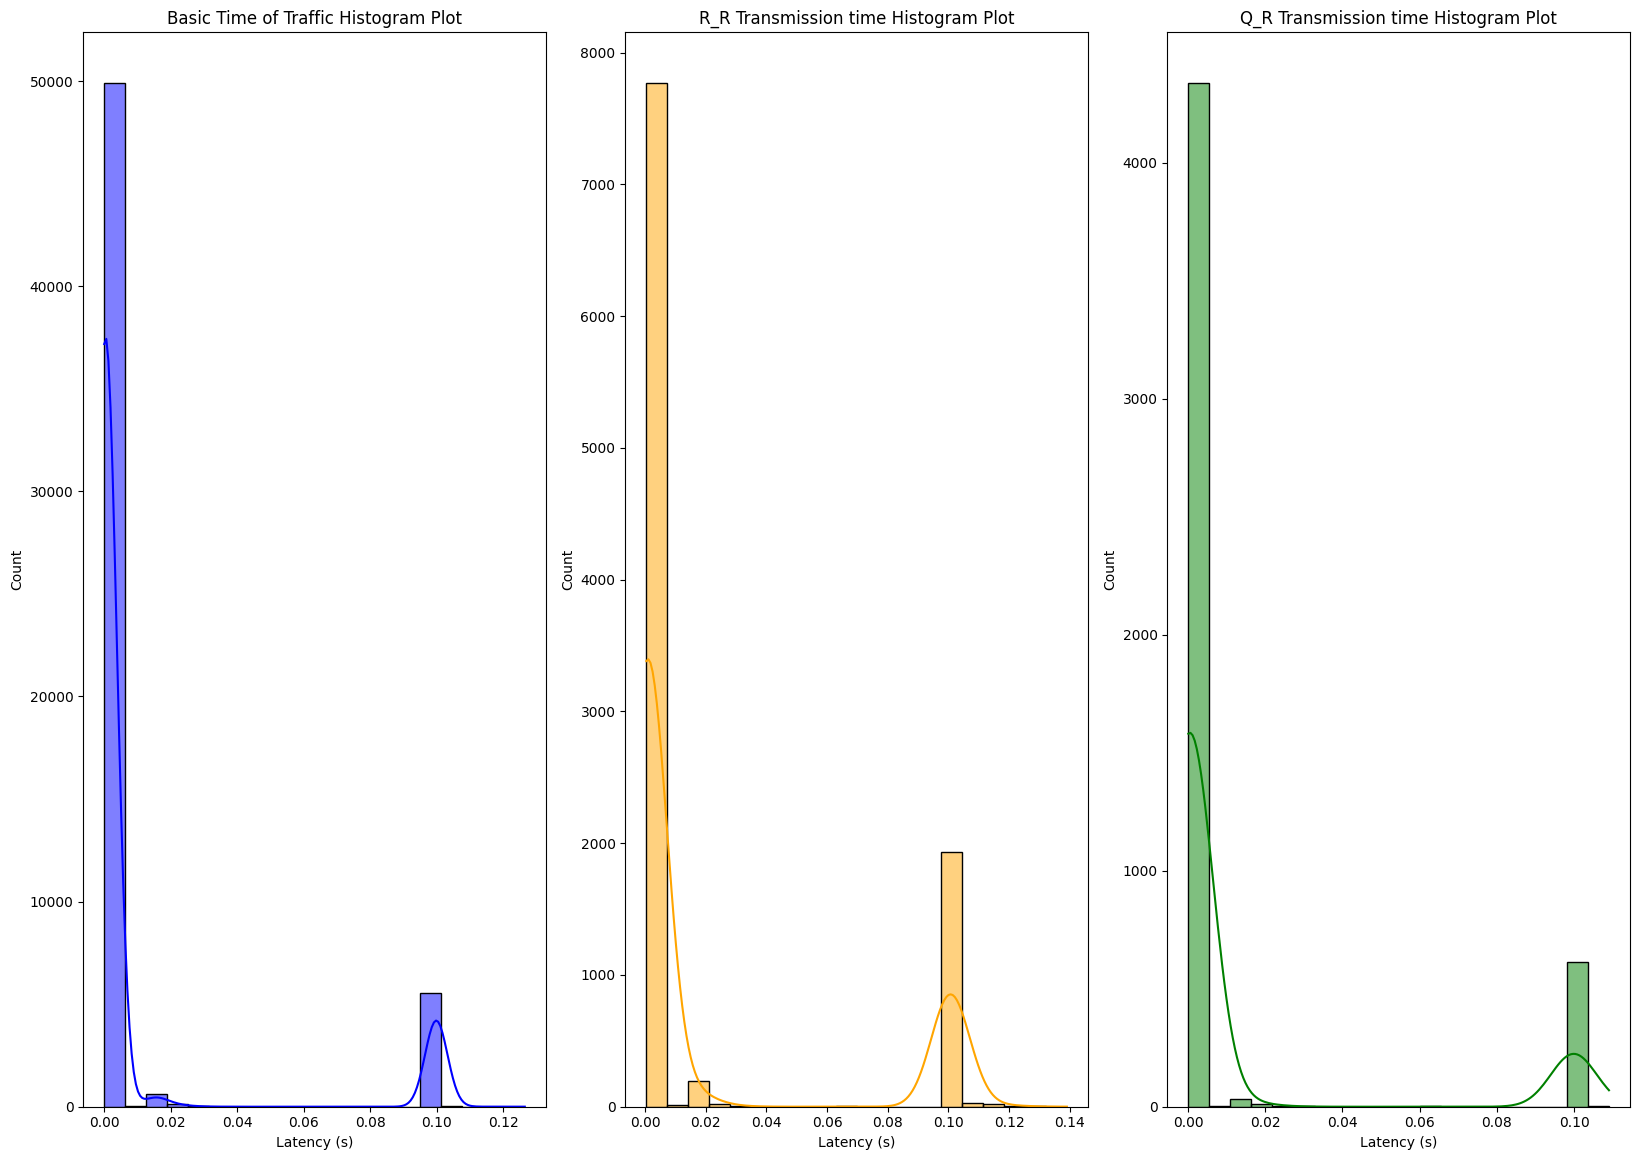




Figure 6: Histogram of three defined time latencies in figure 3 & 4, for all five experiments.



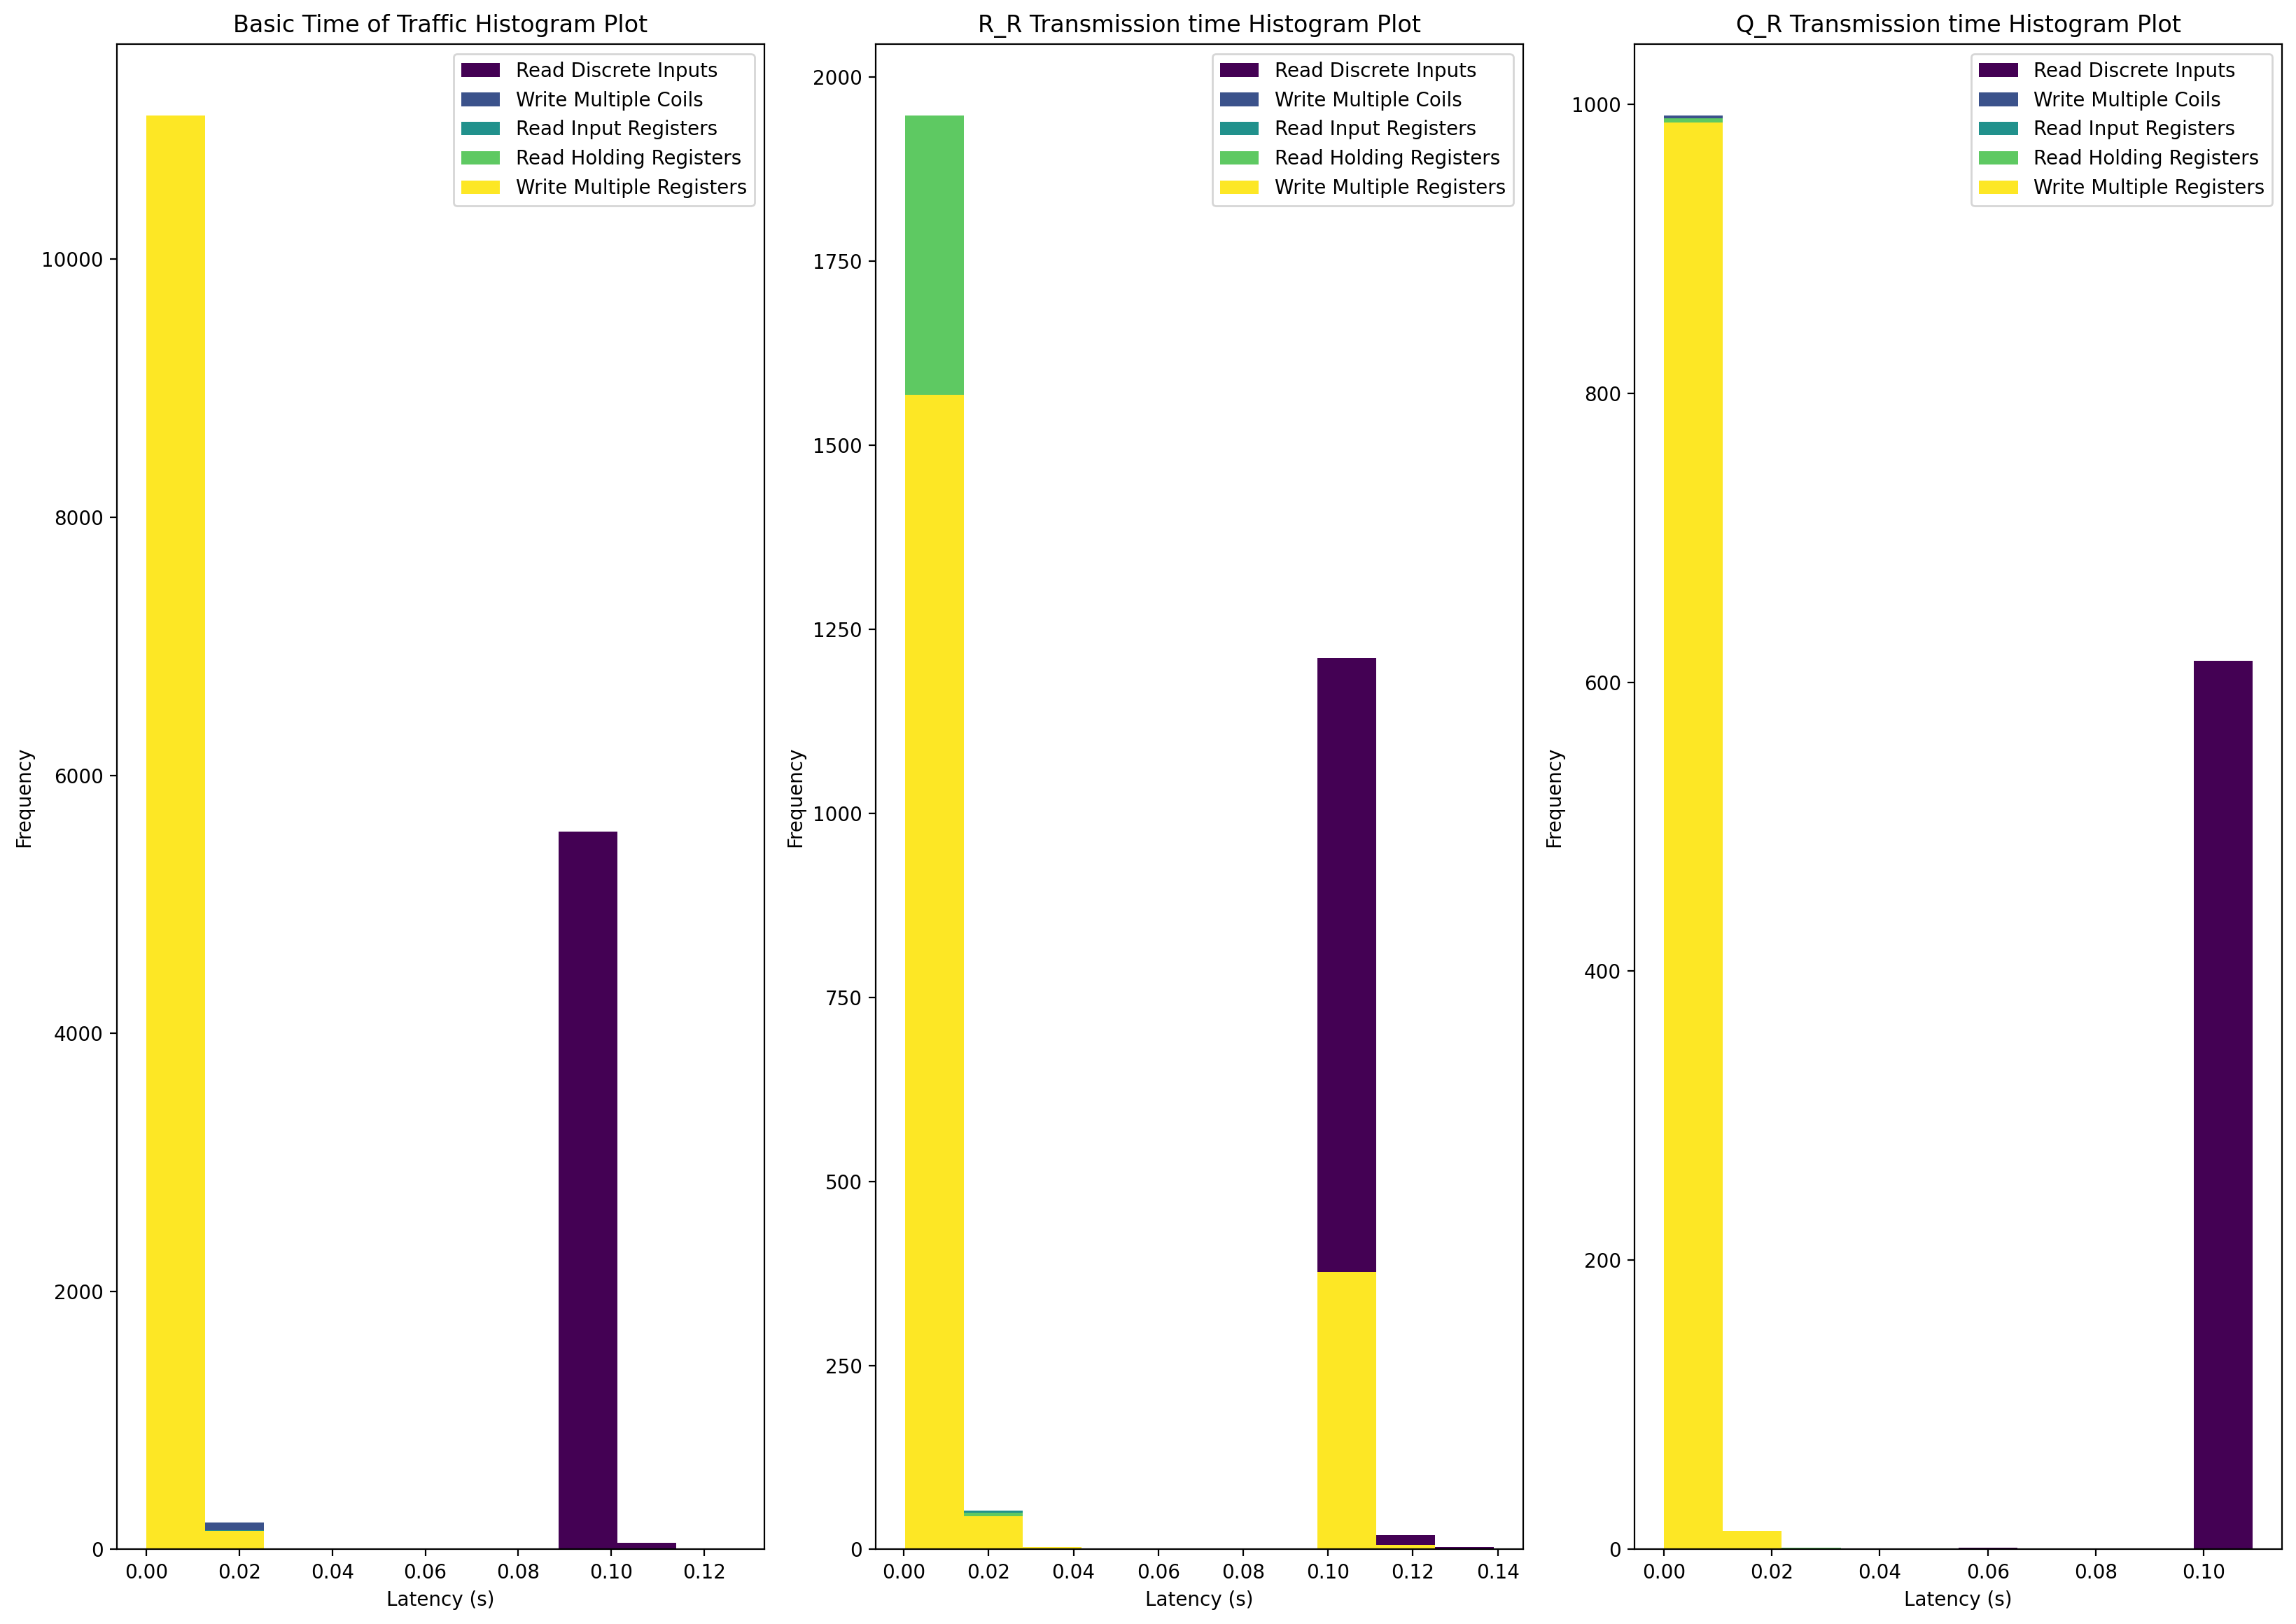




Figure 7: Histogram of three defined time latencies for all five experiments which are separated based on five Modbus functions that were used in the experiments.



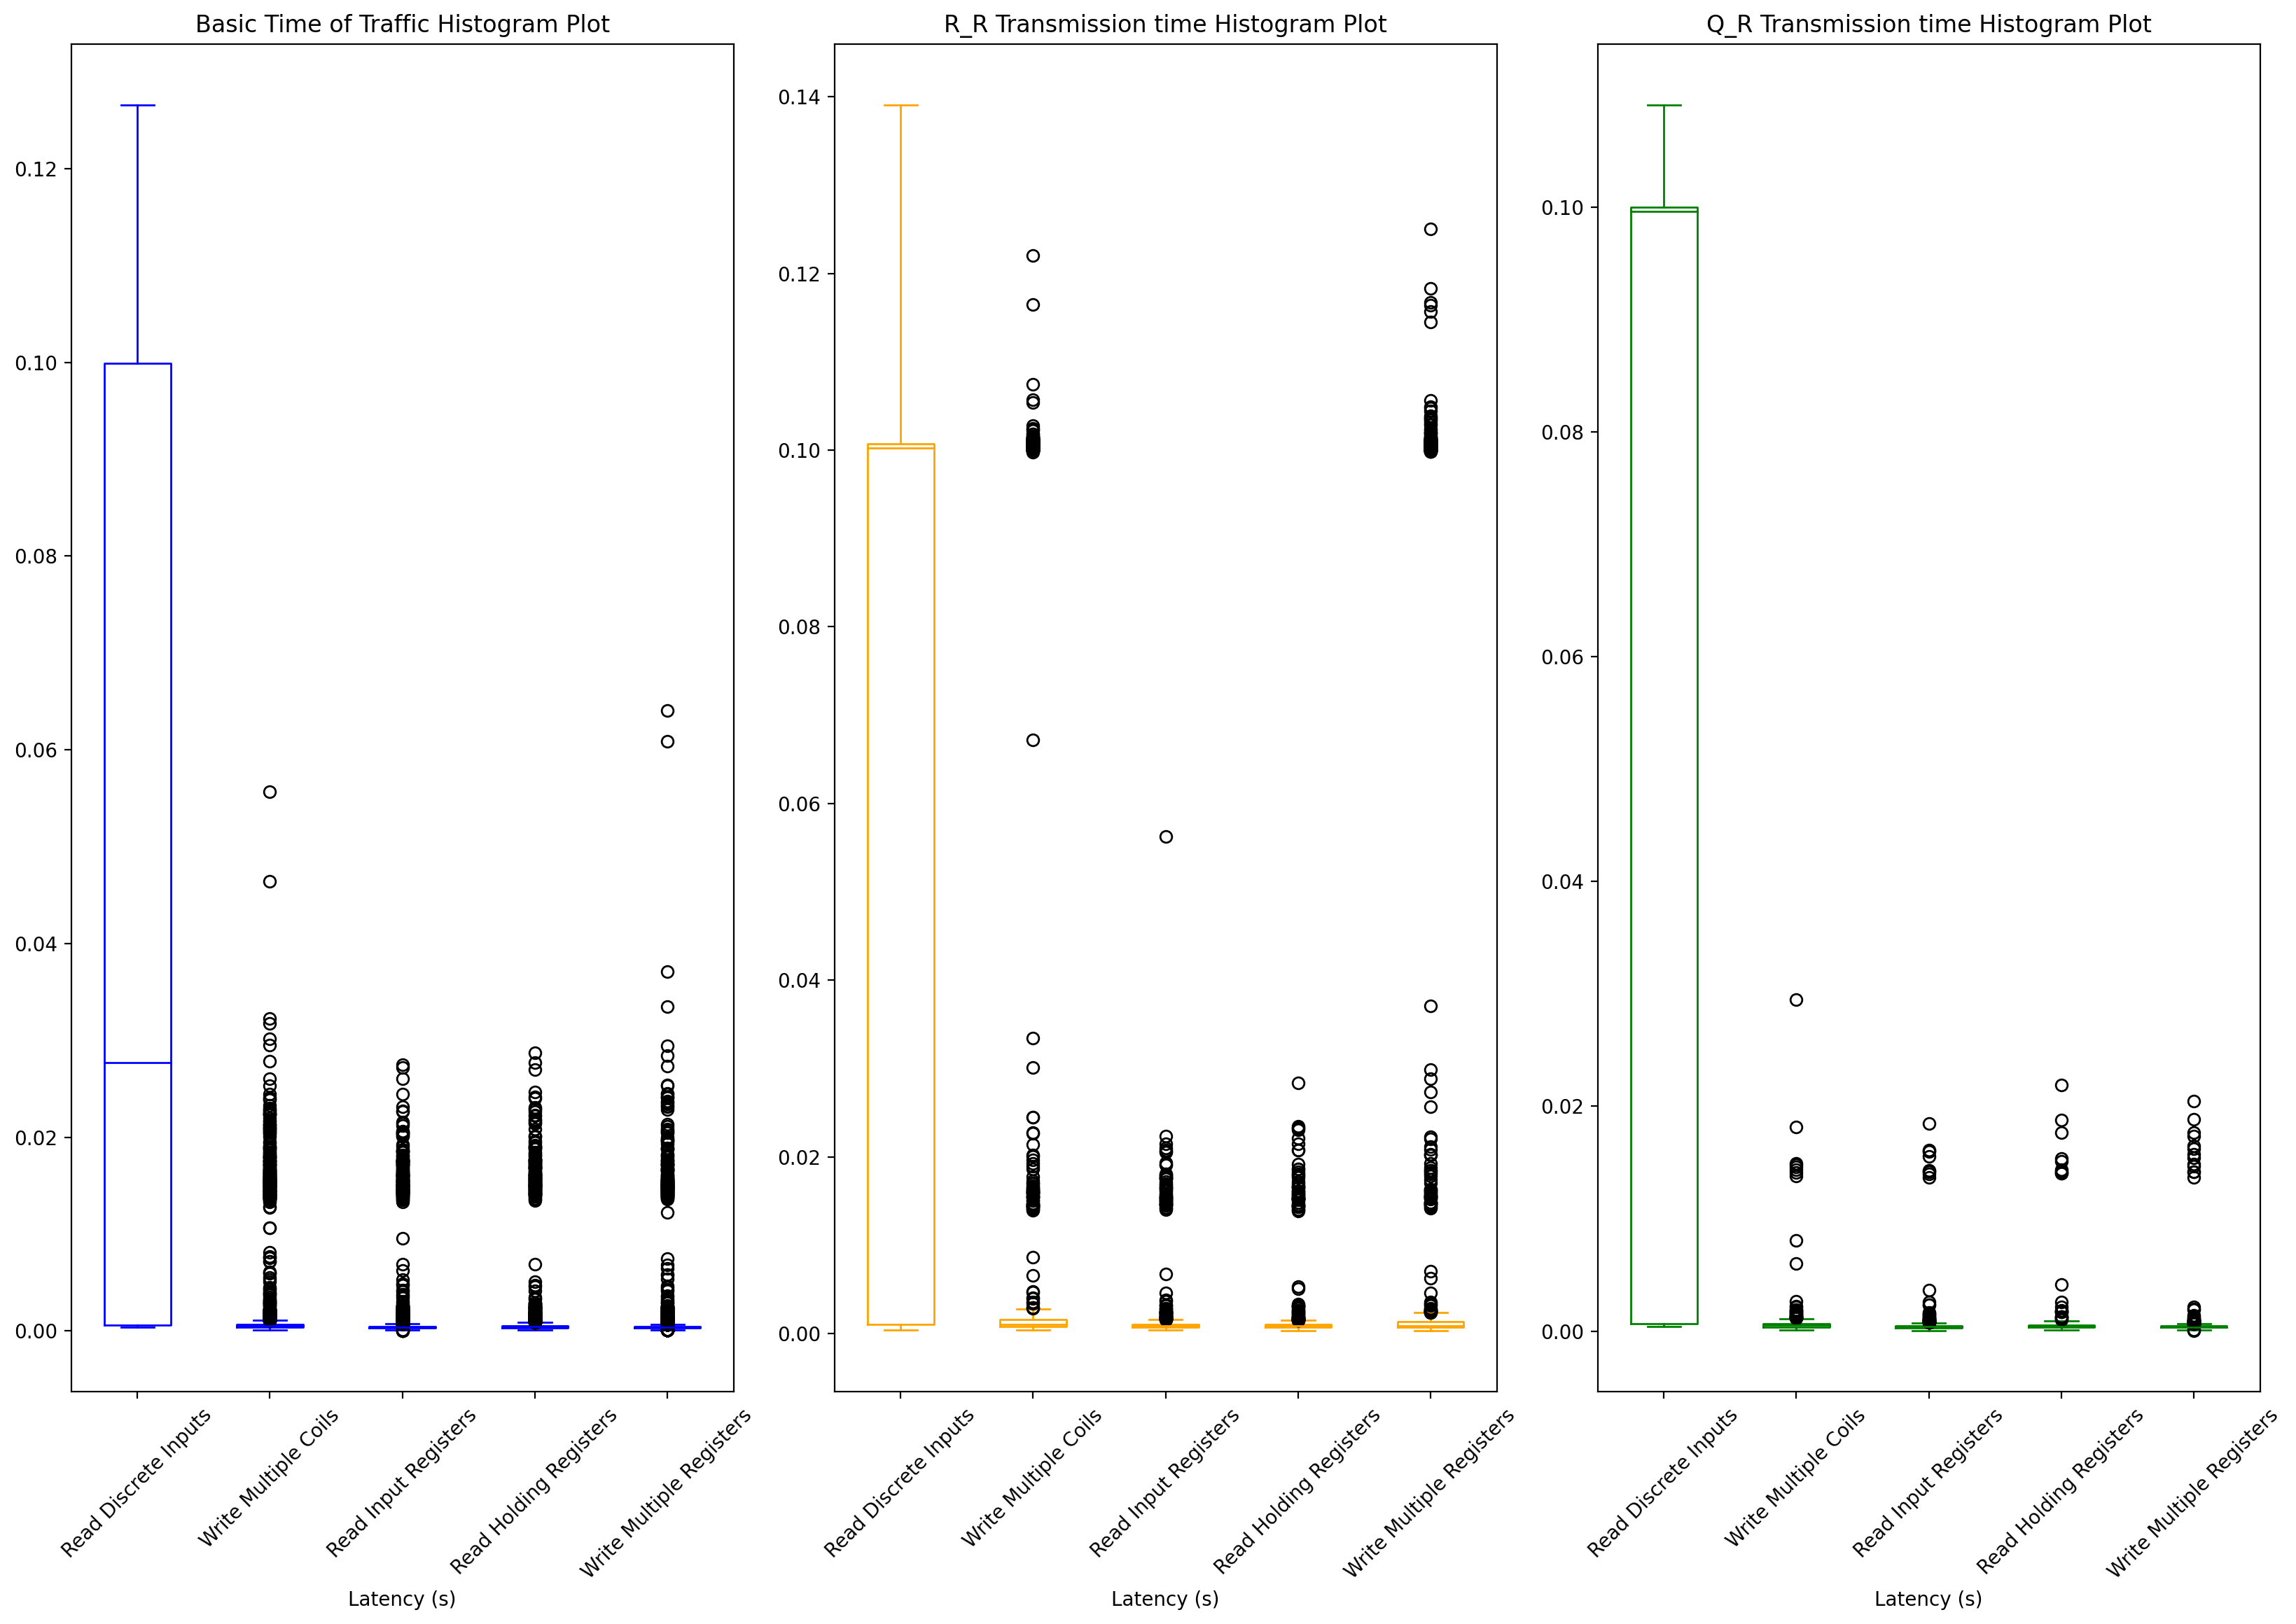




Figure 8: Box Plots for figure 7 data frame.



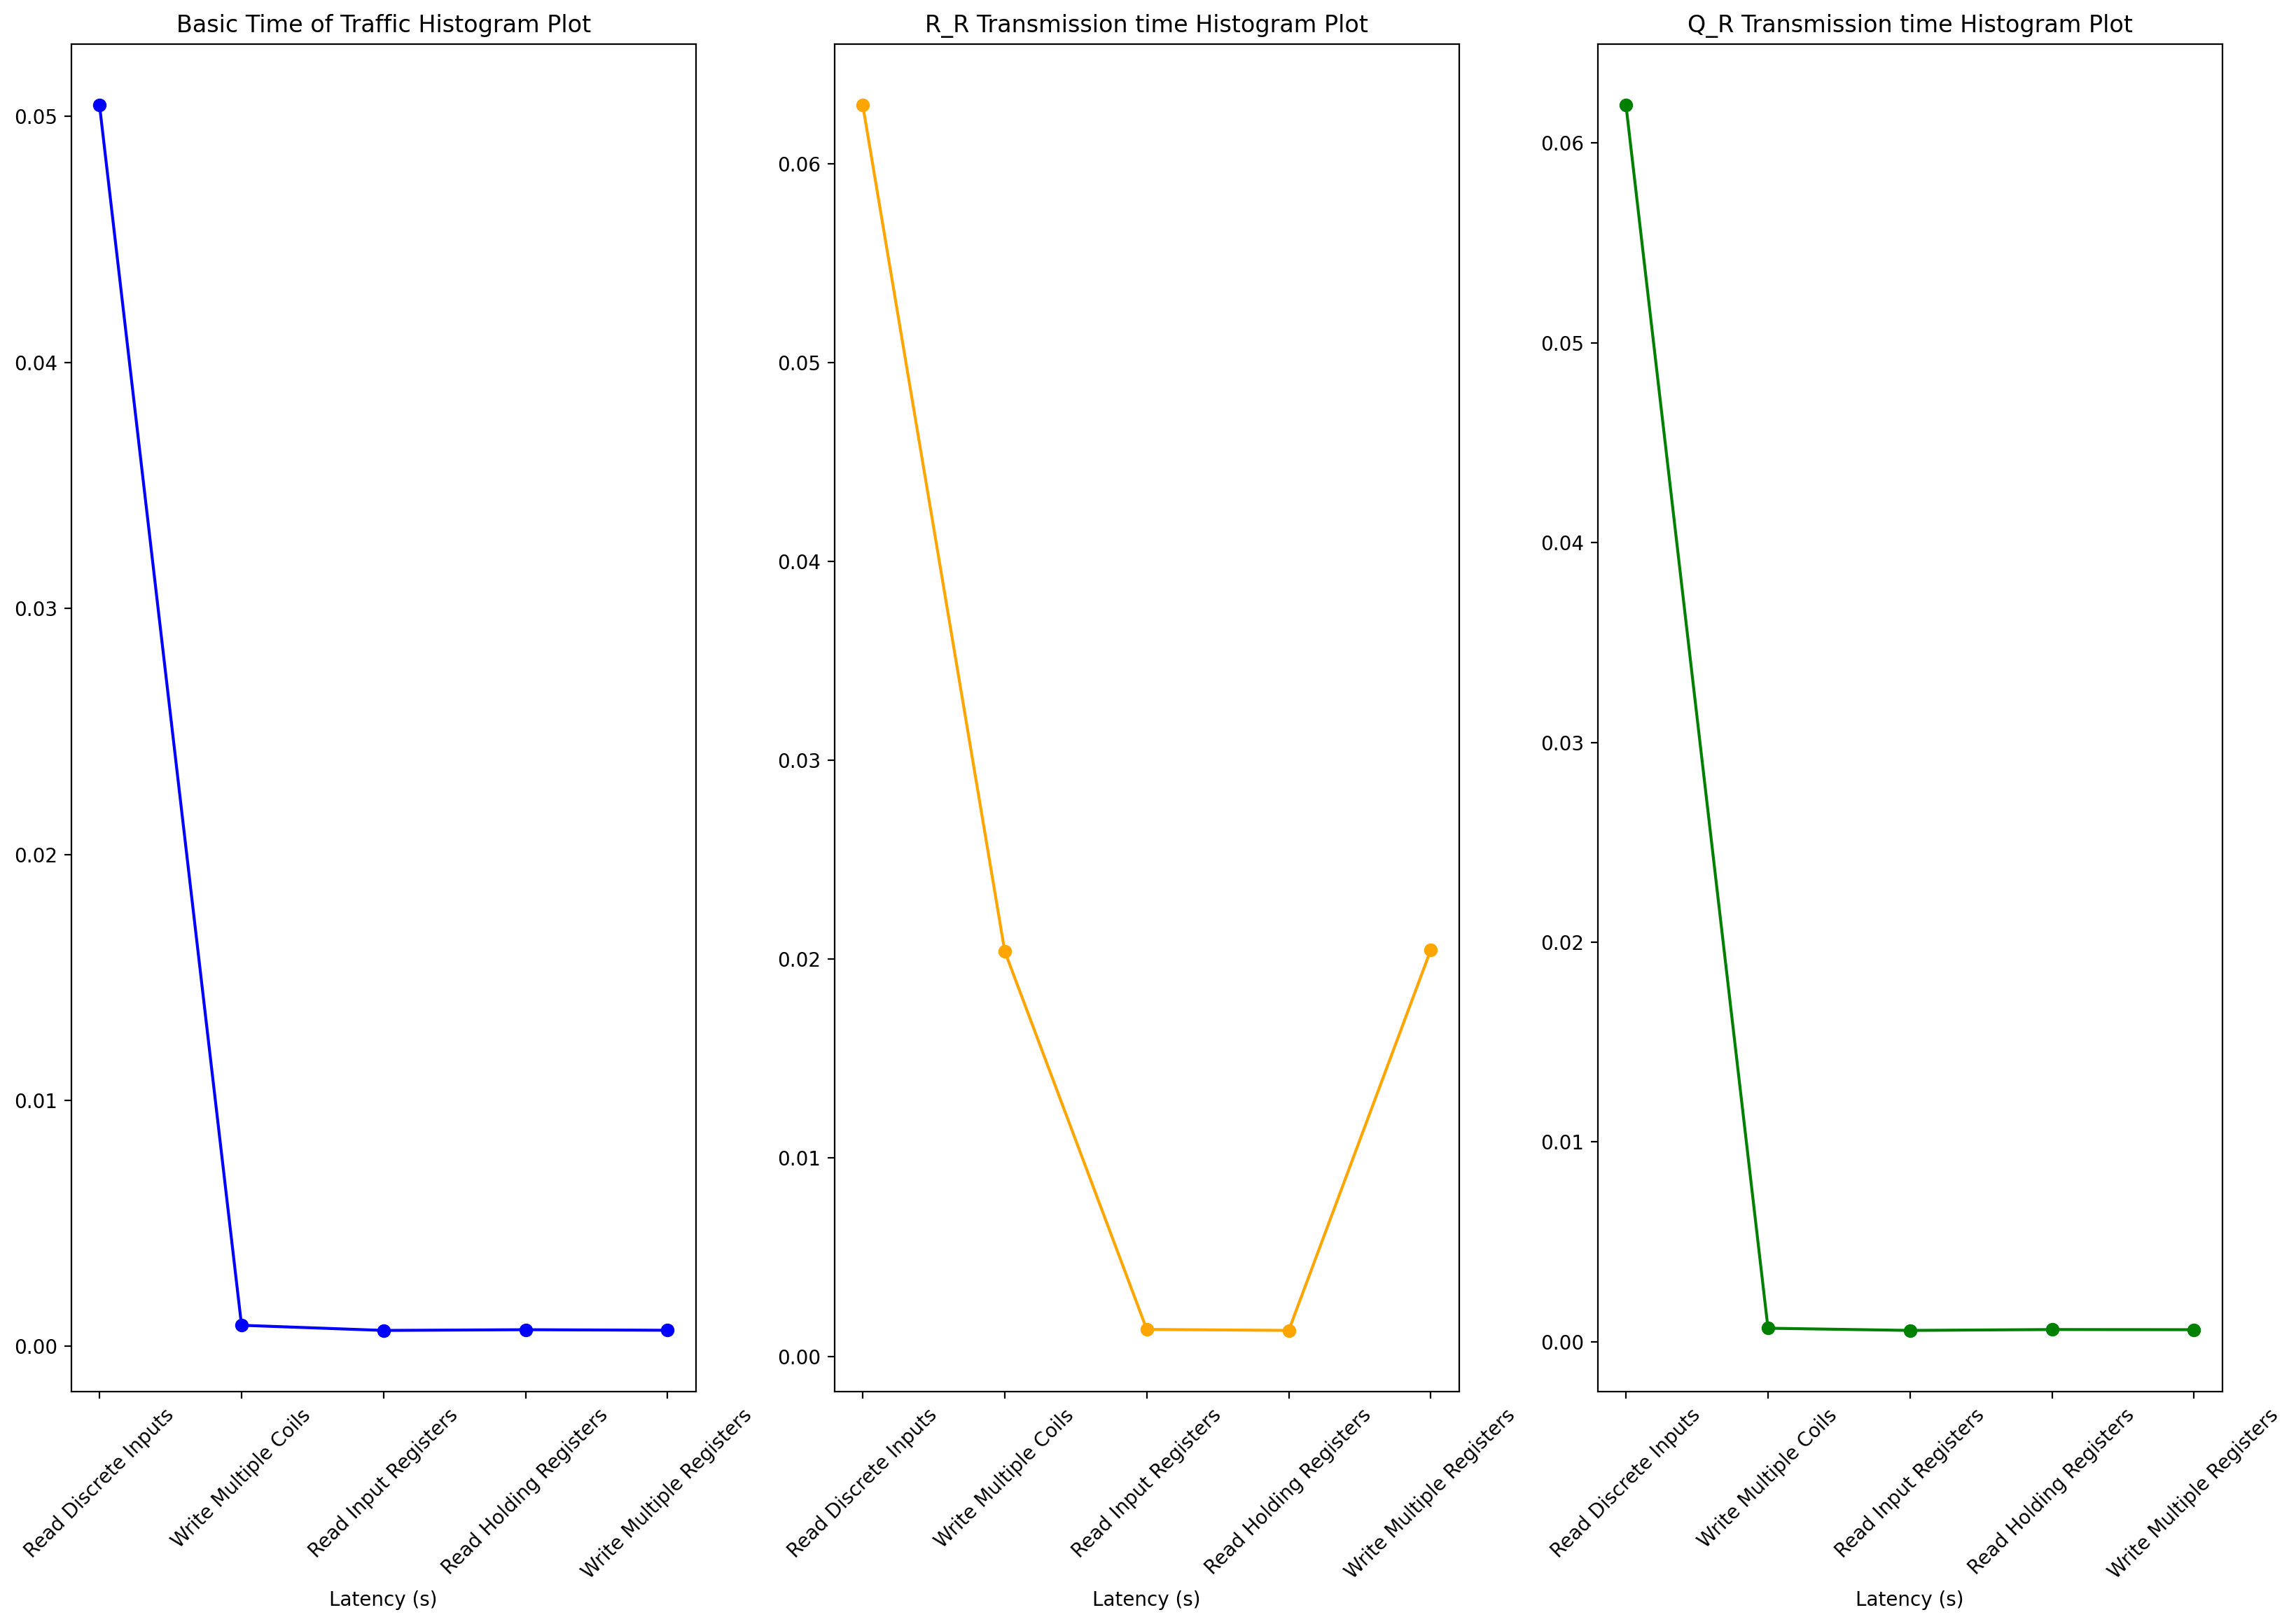




Figure 9: Scatter Plots of means for figure 7 data frame.



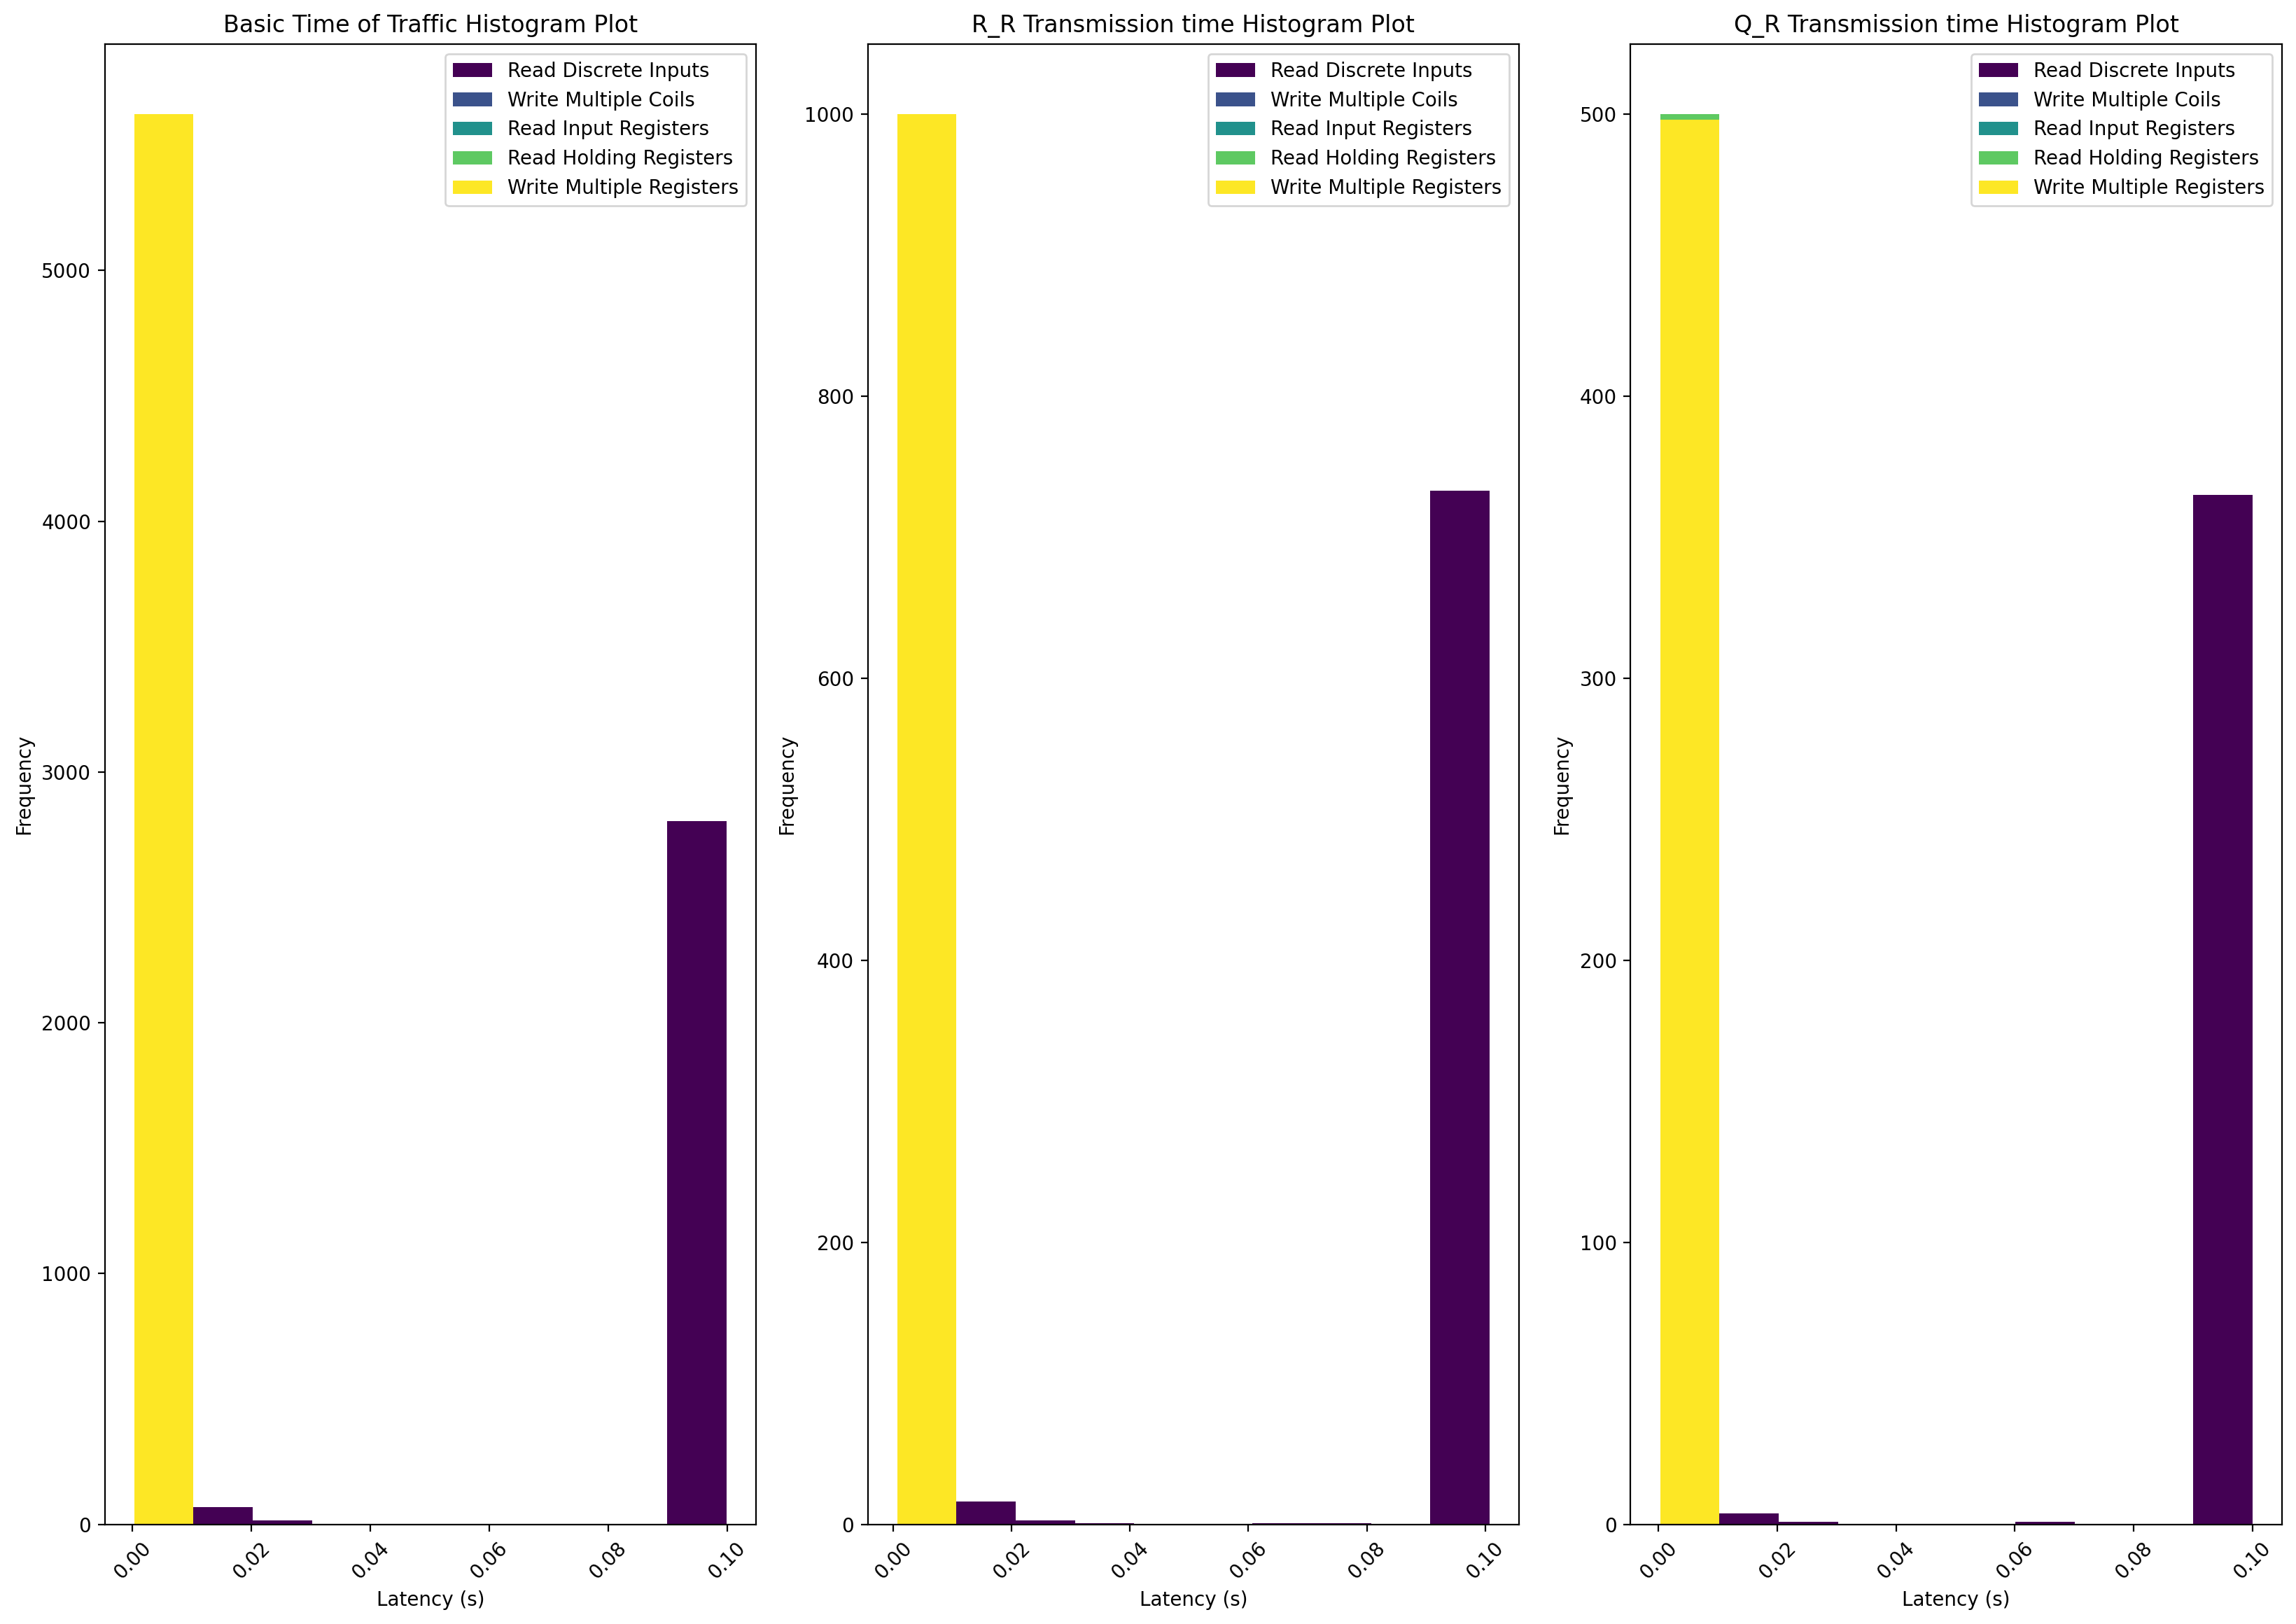




Figure 10: Histogram Plots for figure 7 data frame after excluding quantile 1 & 4.



In [ ]:
## Main function to draw graphs

if permission_graphs_drawing == True:
    # Path to read preproceed df in first part of codes which is the out put of notebook
    path_input =  'Results/Analyzed merged.csv'
    # Since second part of code will apply the output of fisrt part, path_input is the same as path_output
    path_output = path_input
    # Extracting preproceed df
    df = pd.read_csv(path_input)
    pcab_plots_merged(df, path_output)

**6	Results**

To have better perception of captured traffic a summary has been extracted from raw data as shown in figure 5. Accordingly, histograms of different time latency which are discussed in the beginning of section four are drawn in figure 6.

To have a better conception for distribution of different Modbus functions, all of calculated parameters are divided to detected Modbus functions which are extracted from the command column. Figures 7, 8 and 9 are extracted from preprocessed data based on what is discussed in section 4.

To study the role of outliers in regarding followed scenarios to draw figures 6-9, histogram of three defined time latencies for all five experiments which are separated based on five Modbus functions that were used in the experiments are shown in figure 10.

**7 Discussion and Conclusion**

considering figure 5 or text report file it is clear the program could fin only five Modbus functions as commands which are:

* Read Discrete Inputs
* Read Holding Registers
* Read Input Registers
* Write Multiple Coils
* Write Multiple Registers

The five above mentioned commands form the main groups to study distribution of time for all three main considered scenarios:

1. Basic time difference.
2. Response-Response time difference.
3. Query-Response time difference.

In general figure 6 shows time latency for all scenarios without considering Modbus commands that is evidence that during all five experiments the majority of latencies are in domain real time concept (< 25ms or < 0.025s). To have a better analysis in figure 7-9 histogram, boxplot and mean scatter plot are drawn.

Figure 7 shows the distribution of different Modbus commands which are detected by codes. According to the figure: i) values for command "Read Discrete Input" are always out of the range of real time, ii) "Write Multiple Coils" are always out of the minimum time to be considered as real time, iii) in general number of "Read Input Register" values are very small and out of the real time domain in all scenarios, iv) 'Read Holder Register" is always bigger than 25ms seconds and finally v) in scenarios 1 and 3 "Write Multiple Registers" are always in real time domain; however some of them in scenario 2 are not.

Boxplots in figure 8, are completely aligned with the results of histogram in figure 7, i) values for command "Read Discrete Input" are in very long domain from 0-120ms and its median is around 30ms which is worse in scenario 2, however in 3rd scenario its distribution gets narrow with noncountable numbers of outliers, ii) "Write Multiple Coils" are full of outliers; however, in general it median is around 0, iii) "Read Input Register" also shows a lot of outliers in which they are out of the concept of real time and it is more or less the same for all scenarios, iv)"Read Holder Register" is the same as iii and consequently v) "Write Multiple Registers" follow concept as previous items.

It seems that considering the meaning of values is the easiest way to conclude which commands have been done in real time during five experiments which are aligned with above mentioned discussion. As shown in figure in figure 9, only "Read Discrete Input" values are always out of the range of real time events; however, only in scenario 2, "Write Multiple Coils" is out of real time. In other situation the performance of Modbus commands are occurred in real time.

Figure 10 presents the same histogram as the same figure 7 after deleting outliers. Even though some commands disappear from histogram or impossible to detect clearly, no considerable difference could be supposed for above mentioned discussion.
